WITH K= 1
[[ 93  25]
 [ 19 200]]
accuracy for k= 1 = 0.869


WITH K= 3
[[ 92  26]
 [  9 210]]
accuracy for k= 3 = 0.896


WITH K= 5
[[ 92  26]
 [ 10 209]]
accuracy for k= 5 = 0.893


WITH K= 7
[[ 92  26]
 [  9 210]]
accuracy for k= 7 = 0.896


WITH K= 11
[[ 90  28]
 [ 10 209]]
accuracy for k= 11 = 0.887


WITH K= 13
[[ 78  40]
 [  7 212]]
accuracy for k= 13 = 0.861


WITH K= 17
[[ 79  39]
 [  7 212]]
accuracy for k= 17 = 0.864




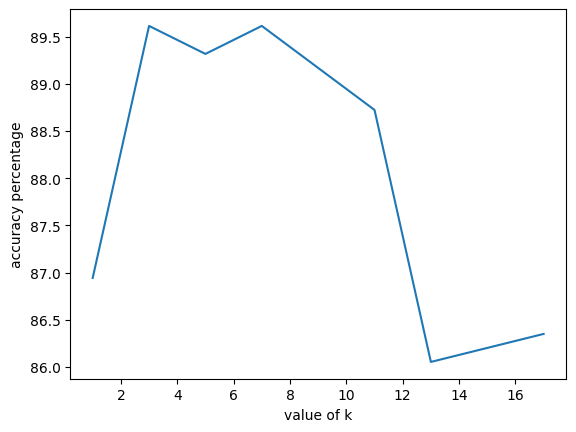

In [1]:
# importing useful libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# reading csv file
data = pd.read_csv("SteelPlateFaults-2class.csv")
# storing column names
column = data.columns.to_numpy()
# splitting the dataset according to class
group = data.groupby('Class')
# converting the class data into numpy array
class_0 = group.get_group(0).to_numpy()
class_1 = group.get_group(1).to_numpy()

# splitting the classes dataset into training and testing sets
train_0, test_0 = train_test_split(
    class_0, test_size=0.30, random_state=42, shuffle=True)
# 0.624 because this is a unbalanced data and the training samples of both classes must be equal
train_1, test_1 = train_test_split(
    class_1, test_size=0.3, random_state=42, shuffle=True)

# combining the class wise splitted dataset
train = np.concatenate((train_0, train_1), axis=0)
test = np.concatenate((test_0, test_1), axis=0)
# converting the splitted data into dataframe
training = pd.DataFrame(train, columns=column)
testing = pd.DataFrame(test, columns=column)
# splitting training dataset into its attributes and labels
X_train = training.iloc[:, :-1].values
X_label_train = training.iloc[:, training.shape[1] - 1].values
# splitting testing dataset into its attributes and labels
X_test = testing.iloc[:, :-1].values
X_label_test = testing.iloc[:, testing.shape[1] - 1].values


# modelling and predicting knn classifier
accuracy_rate = []
k = [1, 3, 5, 7, 11, 13, 17]
acc = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, X_label_train)
    pred = knn.predict(X_test)

    print('WITH K=', i)
    print(confusion_matrix(X_label_test, pred))
    score = accuracy_score(X_label_test, pred)
    print("accuracy for k=", i, "=", round(score, 3))
    print('\n')
    acc.append(score*100)

plt.plot(k, acc)
plt.xlabel("value of k")
plt.ylabel("accuracy percentage")
plt.show()


WITH K= 1
[[111   7]
 [  6 213]]
accuracy for k= 1 = 0.961


WITH K= 3
[[112   6]
 [  3 216]]
accuracy for k= 3 = 0.973


WITH K= 5
[[112   6]
 [  3 216]]
accuracy for k= 5 = 0.973


WITH K= 7
[[107  11]
 [  3 216]]
accuracy for k= 7 = 0.958


WITH K= 11
[[104  14]
 [  3 216]]
accuracy for k= 11 = 0.95


WITH K= 13
[[104  14]
 [  3 216]]
accuracy for k= 13 = 0.95


WITH K= 17
[[103  15]
 [  3 216]]
accuracy for k= 17 = 0.947




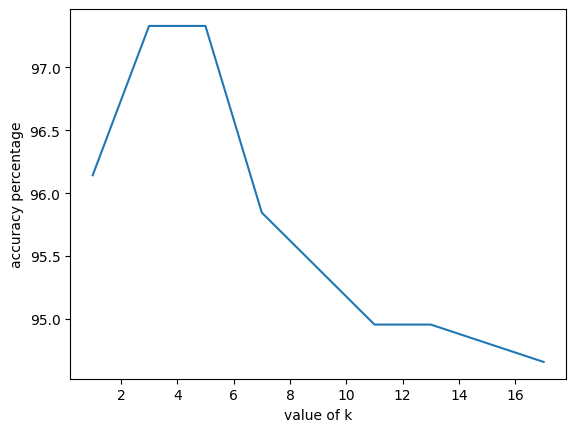

In [2]:
# importing useful libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# reading csv file
data = pd.read_csv("SteelPlateFaults-2class.csv")
# storing column names
column = data.columns.to_numpy()
# splitting the dataset according to class
group = data.groupby('Class')
# converting the class data into numpy array
class_0 = group.get_group(0).to_numpy()
class_1 = group.get_group(1).to_numpy()

# splitting the classes dataset into training and testing sets
train_0, test_0 = train_test_split(
    class_0, test_size=0.30, random_state=42, shuffle=True)
# 0.624 because this is a unbalanced data and the training samples of both classes must be equal
train_1, test_1 = train_test_split(
    class_1, test_size=0.3, random_state=42, shuffle=True)

# combining the class wise splitted dataset
train = np.concatenate((train_0, train_1), axis=0)
test = np.concatenate((test_0, test_1), axis=0)
# converting the splitted data into dataframe
training = pd.DataFrame(train, columns=column)
testing = pd.DataFrame(test, columns=column)

# normalising the dataset
norm_train = training.copy()
norm_test = testing.copy()

for columns in norm_test:
    if columns == "Class":
        continue
    else:
        minimum = norm_train[columns].min()
        maximum = norm_test[columns].max()
        norm_train[columns] = (norm_train[columns]-minimum)/(maximum-minimum)
        norm_test[columns] = (norm_test[columns]-minimum)/(maximum-minimum)
# saving the new normalize dataset
norm_train.to_csv('SteelPlateFaults-train-Normalised.csv', index=False)
norm_test.to_csv('SteelPlateFaults-test-normalised.csv', index=False)

# splitting training dataset into its attributes and labels
X_train = norm_train.iloc[:, :-1].values
X_label_train = norm_train.iloc[:, training.shape[1] - 1].values
# splitting testing dataset into its attributes and labels
X_test = norm_test.iloc[:, :-1].values
X_label_test = norm_test.iloc[:, testing.shape[1] - 1].values


# modelling and predicting knn classifier
accuracy_rate = []
k = [1, 3, 5, 7, 11, 13, 17]
acc = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, X_label_train)
    pred = knn.predict(X_test)

    print('WITH K=', i)
    print(confusion_matrix(X_label_test, pred))
    score = accuracy_score(X_label_test, pred)
    print("accuracy for k=", i, "=", round(score, 3))
    print('\n')
    acc.append(score*100)

plt.plot(k, acc)
plt.xlabel("value of k")
plt.ylabel("accuracy percentage")
plt.show()


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# reading csv file
data = pd.read_csv("SteelPlateFaults-2class.csv")
# storing column names
column = data.columns.to_numpy()
# splitting the dataset according to class
group = data.groupby('Class')
# converting the class data into numpy array
class_0 = group.get_group(0).to_numpy()
class_1 = group.get_group(1).to_numpy()

# splitting the classes dataset into training and testing sets
train_0, test_0 = train_test_split(
    class_0, test_size=0.30, random_state=42, shuffle=True)
# 0.624 because this is a unbalanced data and the training samples of both classes must be equal
train_1, test_1 = train_test_split(
    class_1, test_size=0.3, random_state=42, shuffle=True)

# combining the class wise splitted dataset
train = np.concatenate((train_0, train_1), axis=0)
test = np.concatenate((test_0, test_1), axis=0)
# converting the splitted data into dataframe
training = pd.DataFrame(train, columns=column)
testing = pd.DataFrame(test, columns=column)

# for bayes classifier dropping the columns
training = training.drop(
    ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Y_Minimum', 'X_Minimum'], axis=1)
testing = testing.drop(
    ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Y_Minimum', 'X_Minimum'], axis=1)
# splitting training dataset into its attributes and labels
X_train = training.iloc[:, :-1].values
y_train = training.iloc[:, training.shape[1] - 1].values
# splitting testing dataset into its attributes and labels
X_test = testing.iloc[:, :-1].values
y_test = testing.iloc[:, testing.shape[1] - 1].values

# sample mean and covariance for class 0
training_0 = pd.DataFrame(train_0, columns=column)
training_0 = training_0.drop(
    ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Y_Minimum', 'X_Minimum'], axis=1)
X_train_0 = training_0.iloc[:, :-1].values
y_train_0 = training_0.iloc[:, training_0.shape[1] - 1].values
mean_0 = np.mean(X_train_0, axis=0)
cov_0 = np.cov(X_train_0.T)
column_num = [x for x in range(1, 24)]
matrix_0 = pd.DataFrame(X_train_0, columns=column_num)
covariance_0 = pd.DataFrame(matrix_0.cov().T.round(decimals=3))
covariance_0.to_csv('covariance_0.csv')
print("Mean of class 0:\n", [round(x, 3) for x in mean_0])
# sample mean and covariance for class 1
training_1 = pd.DataFrame(train_1, columns=column)
training_1 = training_1.drop(
    ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Y_Minimum', 'X_Minimum'], axis=1)
X_train_1 = training_1.iloc[:, :-1].values
y_train_1 = training_1.iloc[:, training_1.shape[1] - 1].values
mean_1 = np.mean(X_train_1, axis=0)
cov_1 = np.cov(X_train_1.T)
matrix_1 = pd.DataFrame(X_train_1, columns=column_num)
covariance_1 = pd.DataFrame(matrix_1.cov().T.round(decimals=3))
covariance_1.to_csv('covariance_1.csv')

print("Mean of class 1:\n", [round(x, 3) for x in mean_1])
# calculating prior probabilities for both classes
prior0 = len(X_train_0) / len(X_train)
prior1 = len(X_train_1) / len(X_train)


# defining the likelihood function
def likelihood(x, mean, cov):
    power = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean))
    return (np.exp(power)) / ((2 * np.pi) ** 11.5 * (np.linalg.det(cov)) ** 0.5)


# calculate the likelihood and predicting class according to it
y_bayes_pred = []
for x in X_test:
    l0 = likelihood(x, mean_0, cov_0) * prior0
    l1 = likelihood(x, mean_1, cov_1) * prior1
    if l0 > l1:
        y_bayes_pred.append(0)

    else:
        y_bayes_pred.append(1)

print("The confusion matrix for Bayes model is\n",
      confusion_matrix(y_test, y_bayes_pred))
print("The accuracy for Bayes model is", round(
    accuracy_score(y_test, y_bayes_pred), 3))


Mean of class 0:
 [273.418, 1583169.659, 7779.663, 393.835, 273.183, 843350.275, 53.326, 135.762, 1382.762, 40.073, 0.123, 0.459, 0.592, 0.108, 0.55, 0.523, 0.288, 3.623, 2.057, 1.848, -0.314, -0.115, 0.925]
Mean of class 1:
 [723.656, 1431588.69, 585.967, 54.491, 45.658, 62191.126, 96.236, 130.452, 1480.018, 104.214, 0.385, 0.427, 0.513, 0.02, 0.608, 0.831, 0.608, 2.287, 1.227, 1.318, 0.136, -0.116, 0.543]
The confusion matrix for Bayes model is
 [[102  16]
 [  3 216]]
The accuracy for Bayes model is 0.944


In [4]:
import pandas as pd

# done from previous questions
classifier = ["KNN", "KNN with norm_data", "Bayes classifier"]
accuracy = [89.6, 97.3, 94.4]

# making dataframe
accuracy_table = pd.DataFrame(accuracy, classifier)
print(accuracy_table)


                       0
KNN                 89.6
KNN with norm_data  97.3
Bayes classifier    94.4
